# ALEXNET ALGORITHM

#### AlexNet Convolutional Neural Network(CNN) architecture is implemented using TensorFlow and Keras.

In [6]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
#import tensorflow.keras        
import matplotlib.pyplot as plt
import numpy as np

# Loading CIFAR10 dataset

#### CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
 link to the dataset: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [28]:
(train_images, train_labels), (test_images,test_labels)= keras.datasets.cifar10.load_data()

In [88]:

# this is done for an easy manipulation of the dataset
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [29]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

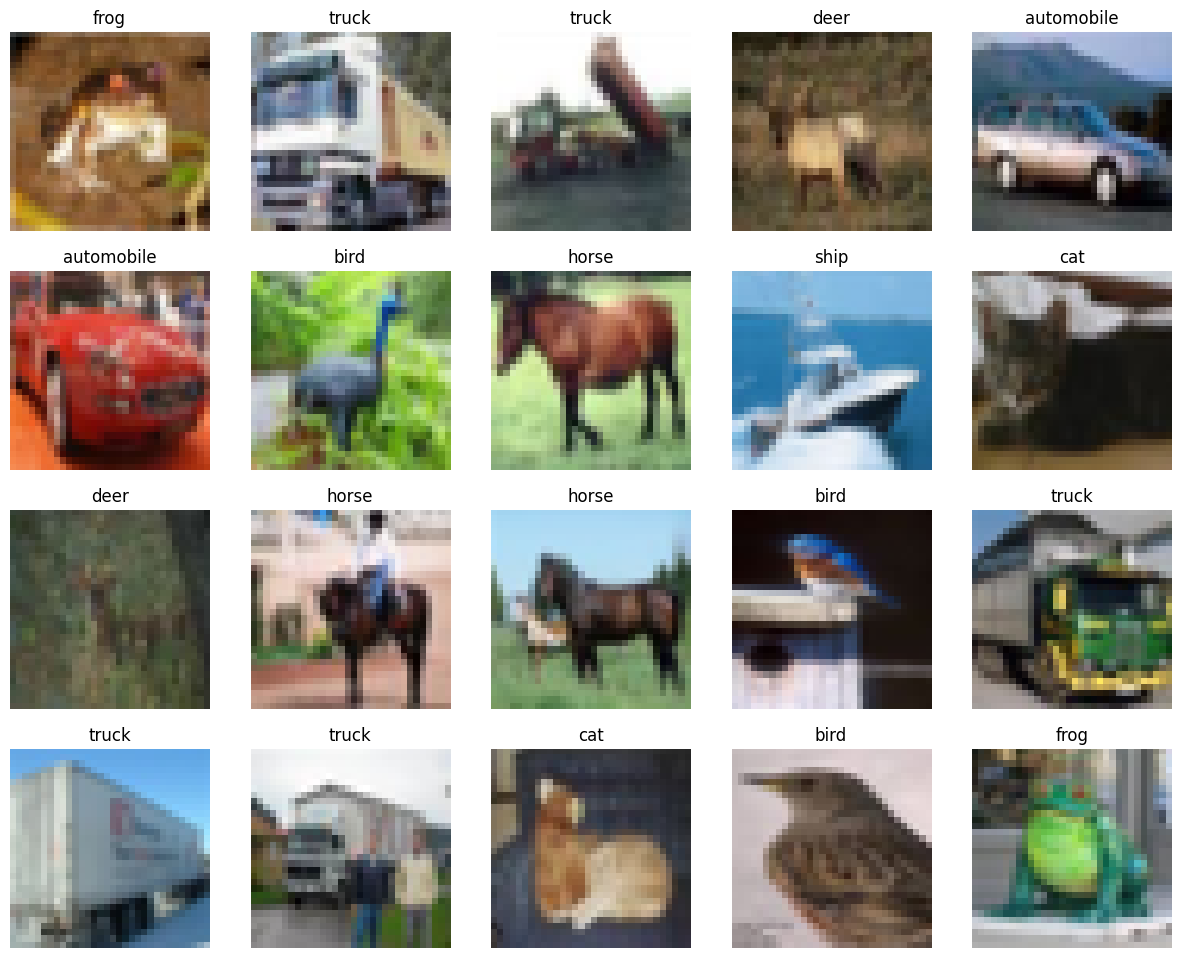

In [31]:
# visualizing some of the images from the dataset
plt.figure(figsize=(15,15))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

## Preprocessing and Standardizing the data

In [36]:

train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)


Train size: 50000
Test size: 10000


### Implementing a data pipeline to further process the dataset

1. Preprocessing the data within the dataset
2. Shuffle the dataset
3. Batch data within the dataset

In [89]:
# preprocessing the data

def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (64,64))
    return image, label

In [90]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)

Training data size: 50000
Test data size: 10000


In [91]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

# Implementing the Model
### Implementing the AlexNet CNN architecture from the scratch
#### The model is made up of the following layers:
    1. Convolutional Layer
    2. Batch Normalisation Layer
    3. MaxPooling Layer
    4. Flatten Layer
    5. Dense Layer

![Alt text](../Downloads/alexnet_architecture.png)

In [ ]:
# defining the model
def AlexNet():

    model= Sequential()
    model.add(Conv2D(filters=128,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(64,64,3)))
    
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'))
    
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'))
    
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())

    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10,activation='softmax'))

# model compilation
    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']  )

    return model  

#model.summary()


In [ ]:
model= AlexNet()

In [93]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_10 (Bat  (None, 7, 7, 256)        1024      
 chNormalization)                                                
                                                      

In [94]:
history=model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/50
1562/1562 [==============================] - 1710s 1s/step - loss: 2.1213 - accuracy: 0.2524 - val_loss: 1.6067 - val_accuracy: 0.4302
Epoch 2/50
1562/1562 [==============================] - 1754s 1s/step - loss: 1.7085 - accuracy: 0.3806 - val_loss: 1.4355 - val_accuracy: 0.4854
Epoch 3/50
   1/1562 [..............................] - ETA: 2:49:12 - loss: 1.7211 - accuracy: 0.3750

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000028488945620>
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


#### Due to the computational limititaion experienced, the training was cut short to just 2 epochs.
